<a href="https://colab.research.google.com/github/osnapitstrix/ML2019-Draft-Repository/blob/master/Copy_of_31005_Practical_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*******************************************************************************
SUBJECT NAME & ID:
        **MACHINE LEARNING** | **31005**

ASSESSMENT TASK 2:
        **Practical Machine Learning Project**

STUDENT NAME & ID:      

>>>>*   **PATRICIA ANN ACOSTA**  | **13205669**
*   **LADA MEAS** | **12729582**
 
DATASET CHOSEN:
        **" MY UBER DRIVES - 2016 "**
      [click here](https://www.kaggle.com/zusmani/uberdrives)

*******************************************************************************

# INTRODUCTION

Uber has become a very interesting research topic and is regarded as an emerging technology in the transportation and taxi industry. It is mainly used to take passengers from point A to point B. This technology has been used extensively as an alternative for getting to destinations of customers for private or business functions. 
 
Currently, there is intense competition among various rental taxi service operators. The motivation of this project is to understand customer behaviour of an ordinary Uber customer. This is done by the exploration and evaluation of the length of trips, the number of rides per day and percentage of business miles and personal miles based on the purpose of the journey made by Uber customers. By analysing this data, the report will help understand correlations between attributes, thereby predicting trends and behaviour of Uber customers. This data mining project will then play a significant role in assisting Uber to gain a competitive advantage in the market by providing improved service on inter-city and intra-city commuting problems of customers. In addition, understanding Uber customer behaviour and trends is useful and beneficial when creating effective marketing strategies to retain customer base and attract more users to their service. 
 
The dataset used in the project was provided by Zeeshan-ul-hassan Usmani through Kaggle. Zeeshan-ul-hassan Usmani made the 2016 Uber Trip database due to research inspiration from FiveThirtyEight and Todd Schneider's dataset on Trips taken by Uber and Taxi in New York City. There are two inputs which include the 2016 Uber Trip training dataset and testing dataset. The training dataset contains seven different attributes to be processed through various classifiers. The test data includes only input training data and assesses the performance of the classifiers.

The inputted training dataset must be pre-processed to produce higher quality results and better accuracy. Various pre-processing methods, namely removing null values, fixing categorisation of START_DATE* and END_DATE* columns and calculation of maximum in the MILES* column were done to refine the training dataset. After the data was made usable, different classifiers were explored.
 
The report concentrates on four classifiers, specifically Logical Regression, K-Nearest Neighbour, Decision Tree and Random Forest. The report will evaluate and identify the best classifier and corresponding parameters to use. The decision will be based on the box plot, confusion matrix and accuracy statistics. Using the best classifier, the report will state its reflections on the correlations studied and its recommendations.

# INITIAL DATA EXPLORATION

In [0]:
#basci libraries that need to be imported
import pandas as pd 
import numpy as np
import copy

#required libraries for classification techniques
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt 
from sklearn import model_selection 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

#import different types of classifiers techniques
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
from google.colab import auth
auth.authenticate_user()

!pip install -U -q Pydrive
from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

data = drive.CreateFile({'id':'1l-xWB5poscP3cglKDZtyX8dJQC79Z3Fo'})
data.GetContentFile('My Uber Drives - 2016.csv')

In order to do the data exploration and pre-processing, the data was imported from the Excel Spreadsheet. 

The summary of the 2016 Uber Trip dataset is provided in the figures below:

In [0]:
data = pd.read_csv('My Uber Drives - 2016.csv')

In [0]:
#The code here is used to print the total number of rows & columns. This means there are 1156 records with 7 columns.
print(data.shape)

(1156, 7)


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
START_DATE*    1156 non-null object
END_DATE*      1155 non-null object
CATEGORY*      1155 non-null object
START*         1155 non-null object
STOP*          1155 non-null object
MILES*         1156 non-null float64
PURPOSE*       653 non-null object
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [0]:
#The code here prints the first 5 rows of the dataset using  data header.
data.head(5)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/16 21:11,1/1/16 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/16 01:25,1/2/16 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/16 20:25,1/2/16 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/16 17:31,1/5/16 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/16 14:42,1/6/16 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [0]:
#This code here prints the last 10 rows of the dataset 
data.tail(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1146,12/30/2016 11:31,12/30/2016 11:56,Business,Kar?chi,Kar?chi,2.9,Errand/Supplies
1147,12/30/2016 15:41,12/30/2016 16:03,Business,Kar?chi,Kar?chi,4.6,Errand/Supplies
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Kar?chi,Kar?chi,4.6,Meeting
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Kar?chi,Kar?chi,0.8,Customer Visit
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


## **Main Attributes**



### **1. START_DATE***

#### **Attribute Type:**
The START_DATE* attribute describes the date when the Uber Trip starts.

This attribute is non-null object based on the initial exploration summary. 

#### **Value Range:**

There are 1155 unique dates presented in the figure below. 

In [0]:
#The code here is to show the count of the Uber trip starting dates.
print((data.groupby('START_DATE*')).size())

START_DATE*
1/1/16 21:11       1
1/10/16 08:05      1
1/10/16 12:17      1
1/10/16 15:08      1
1/10/16 18:18      1
1/10/16 19:12      1
1/11/16 08:55      1
1/11/16 11:56      1
1/11/16 13:32      1
1/11/16 14:30      1
1/12/16 12:33      1
1/12/16 12:53      1
1/12/16 14:42      1
1/12/16 15:13      1
1/12/16 15:42      1
1/12/16 16:02      1
1/13/2016 13:54    1
1/13/2016 15:00    1
1/14/2016 16:29    1
1/14/2016 21:39    1
1/15/2016 0:41     1
1/15/2016 11:43    1
1/15/2016 13:26    1
1/18/2016 14:55    1
1/18/2016 16:13    1
1/19/2016 10:55    1
1/19/2016 9:09     1
1/2/16 01:25       1
1/2/16 20:25       1
1/20/2016 10:36    1
                  ..
9/12/16 11:15      1
9/12/16 13:04      1
9/13/2016 16:56    1
9/14/2016 11:55    1
9/15/2016 20:33    1
9/16/2016 7:08     1
9/18/2016 18:07    1
9/19/2016 14:40    1
9/19/2016 16:23    1
9/19/2016 17:36    1
9/19/2016 19:10    1
9/19/2016 6:18     1
9/2/16 11:37       1
9/2/16 18:56       1
9/20/2016 11:29    1
9/20/2016 20:47    1
9

*Figure 1: Various START_DATE*


Based on Figure 1: Various START_DATE*, there are 1155 unique starting dates and the data type is int64. The format of the START_DATE* in this figure is month/date/year. Some records have the same date but have different starting times. There are also some inconsistencies with the year format, but it doesn't affect anything as the viewer knows that the trips occurred in 2016.



### **2. END_DATE***

#### **Attribute Type:**
The END_DATE* attribute describes the day when the Uber Trip ends.

This attribute is non-null object based on the initial exploration summary.

#### **Value Range:**

There are 1154 unique dates presented in the figure below.

In [0]:
#The code here is to show the count of the Uber trip ending dates.
print((data.groupby('END_DATE*')).size())

END_DATE*
1/1/16 21:17       1
1/10/16 08:25      1
1/10/16 12:44      1
1/10/16 15:51      1
1/10/16 18:53      1
1/10/16 19:32      1
1/11/16 09:21      1
1/11/16 12:03      1
1/11/16 13:46      1
1/11/16 14:43      1
1/12/16 12:49      1
1/12/16 13:09      1
1/12/16 14:56      1
1/12/16 15:28      1
1/12/16 15:54      1
1/12/16 17:00      1
1/13/2016 14:07    1
1/13/2016 15:28    1
1/14/2016 17:05    1
1/14/2016 21:45    1
1/15/2016 12:03    1
1/15/2016 13:44    1
1/15/2016 1:01     1
1/18/2016 15:06    1
1/18/2016 16:24    1
1/19/2016 11:09    1
1/19/2016 9:23     1
1/2/16 01:37       1
1/2/16 20:38       1
1/20/2016 11:11    1
                  ..
9/12/16 08:12      1
9/12/16 11:24      1
9/12/16 13:44      1
9/13/2016 17:02    1
9/14/2016 11:59    1
9/15/2016 20:38    1
9/16/2016 7:08     1
9/18/2016 18:11    1
9/19/2016 14:56    1
9/19/2016 16:31    1
9/19/2016 18:20    1
9/19/2016 19:49    1
9/19/2016 6:49     1
9/2/16 12:24       1
9/2/16 19:37       1
9/20/2016 11:48    1
9/2

*Figure 2: Various END_DATE*


Based on Figure 2: Various END_DATE, there are 1154 unique starting dates and the data type is int64. However, there is one value missing making it inconsistent with the START_DATE* column. The format of the END_DATE* in this figure is month/date/year. Some records have the same date but have different ending times. There are also some inconsistencies with the year format, but it doesn't affect anything as the viewer knows that the trips occurred in 2016.

For the START_DATE and END_DATE, the number of trip records per day depends on whether there is a public holiday or not. The days leading to these special holidays like Christmas have more trips compared to normal days. It also depends on what days the trips are on as customers normally book trips on weekdays instead of weekends. 

### **3. CATEGORY***

#### **Attribute Type:**
The CATEGORY* attribute describes whether the Uber Trip is for business or personal use.

This attribute is non-null object based on the initial exploration summary. It is also nominal as the values are unique and there is no relation implied.

#### **Value Range:**
The values for this attribute are business and personal.

In [0]:
#This code here reveals the amount of rows that each category has
print((data.groupby('CATEGORY*')).size())

CATEGORY*
Business    1078
Personal      77
dtype: int64


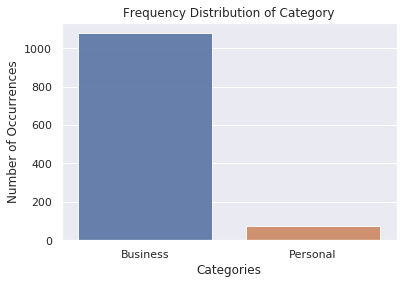

In [0]:
#This code here displays the frequency distribution of the CATEGORY* column in a bar chart form.
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
category_count = data['CATEGORY*'].value_counts()
sns.set(style = "darkgrid")
sns.barplot(category_count.index, category_count.values, alpha = 0.9)
plt.title('Frequency Distribution of Category')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Categories', fontsize = 12)
plt.show()

*Figure 3: CATEGORY Summary and Distribution of CATEGORY* Histogram *



Based on Figure 3: CATEGORY Summary and Distribution of CATEGORY* Histogram, the common category of the 2016 Uber Trips is Business with 1078 followed by personal with 77.

### **4. START***

#### **Attribute Type:**
The START* attribute describes the exact location where the Uber Trip commences.

This attribute is non-null object based on the initial exploration summary. It is also nominal as the values are unique and there is no relation implied.


#### **Value Range:**
The dataset was grouped to count the numerous starting locations. There are 177 unique starting locations presented in the figure below. 

In [0]:
#This code here is to count how many different starting locations are present in the dataset.
print((data.groupby('START*')).size())

START*
Agnew                           4
Almond                          1
Apex                           17
Arabi                           1
Arlington                       1
Arlington Park at Amberly       1
Asheville                       2
Austin                          1
Banner Elk                      8
Bellevue                        1
Berkeley                       16
Boone                           2
Briar Meadow                    1
Bryson City                     5
Burtrose                        1
CBD                             4
Capitol One                     2
Cary                          201
Central                         8
Chalmette                       1
Chapel Hill                     2
Chessington                     2
College Avenue                  1
Colombo                         8
Columbia Heights                1
Congress Ave District           1
Connecticut Avenue              1
Convention Center District      1
Cory                            1
Couples

*Figure 4: Various START* Locations*



Based on Figure 4: Various START* Locations*, there are 177 unique starting locations and the data type is int64. The format of the START* locations are in alphabetical order. Cary is the most common starting location with a record of 201. There are also 148 missing values represented by 'Unknown Location'.

From the full Excel file of the dataset, these interesting conclusions were discovered:

* Most of the trips with Business category starting at Apex all go to Cary. The records that have Cary as a Start Location all occur towards the end of the month and never at the beginning.  

* From November 4-6, the trips started at the same location: Agnew. 

* All trips that have Bryson City all happened on the same day which is October 30. 

* All the trips starting from Banner Elk have Personal Category and all happened in a span of 2 days (July 15-16). 


### **5. STOP***

#### **Attribute Type:**
The STOP* attribute describes the exact location where the Uber Trip finishes.

This attribute is non-null object based on the initial exploration summary.It is also a nominal as the values are unique and there is no relation implied.

#### **Value Range:**
To calculate the value range of this attribute, the dataset was grouped to count the numerous ending locations

In [0]:
#This code here presents the count of how many stopping locations the customers were dropped off at.
print((data.groupby('STOP*')).size())

STOP*
Agnew                          4
Alief                          1
Almond                         1
Apex                          17
Arabi                          1
Arlington                      1
Arlington Park at Amberly      1
Arts District                  1
Asheville                      2
Banner Elk                     8
Bay Farm Island                1
Bellevue                       1
Berkeley                      16
Boone                          2
Briar Meadow                   1
Bryson City                    5
Burtrose                       2
Bywater                        1
CBD                            2
Capitol One                    2
Cary                         203
Cedar Hill                     1
Central                        9
Chalmette                      1
Chapel Hill                    1
Chessington                    3
College Avenue                 1
Colombo                        8
Columbia Heights               1
Congress Ave District          3
    

*Figure 5: Various STOPPING* Locations*


Based on Figure 5: Various STOPPING* Locations*, there are 188 unique starting locations and the data type is int64. The format of the STOP* locations are in alphabetical order. Cary is the most common stopping location with a record of 203. There are also 149 missing values represented by 'Unknown Location'.

### **6. MILES***

#### **Attribute Type:**
The MILES* attribute describes the exact distance from where the Uber Trip starts and where the Uber Trip stops.

This attribute is non-null float based on the initial data exploration summary. It is also interval because it is the difference between the start and stop locations.

#### **Value Range:**

The value range for this attribute is 0.5 to 302 miles. 

In [0]:
#The MILES* column is the only column that is not a not-null object.
data.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


*Figure 6: MILES Statistical Summary*

Based on Figure 6: MILES Statistical Summary, the minimum miles distance is 0.5, the first quartile is 2.9, the second quartile is 6, the third quartile is 10.4 and the maximum miles distance is 12204.7. However, the maximum value is incorrect as this value is the calculated total of miles driven with the dataset records. This problem will be addressed in the later sections of the report. The dataset is also heavily centred the 2.9-10.4, showing the Interquartile range. 

From the full Excel file of the dataset, these interesting points were found:
* The shortest Uber Drive is 0.5 miles with 3 records. These records all have purpose Errand/Supplies and at least 2 minutes in duration. 
* The longest Uber Drive is 310.3 miles which equals 499.38km from Latta to Jacksonville Florida. The duration of this trip was 6 hours. 


### **7. PURPOSE***

#### **Attribute Type:**
The PURPOSE* attribute describes the reason why the customer decided to take the Uber Trip.

This attribute is non-null object based on the initial exploration summary. It is also nominal as the values only act labels.

#### **Value Range:**
The values for this attribute are Airport/Travel, Between Offices, Charity($), Commute, Customer Visit, Errand/Supplies, Meal/Entertain, Meeting, Moving and Temporary Site.


In [0]:
#The code here displays the different purposes of travel.
print((data.groupby('PURPOSE*')).size())

PURPOSE*
Airport/Travel       3
Between Offices     18
Charity ($)          1
Commute              1
Customer Visit     101
Errand/Supplies    128
Meal/Entertain     160
Meeting            187
Moving               4
Temporary Site      50
dtype: int64


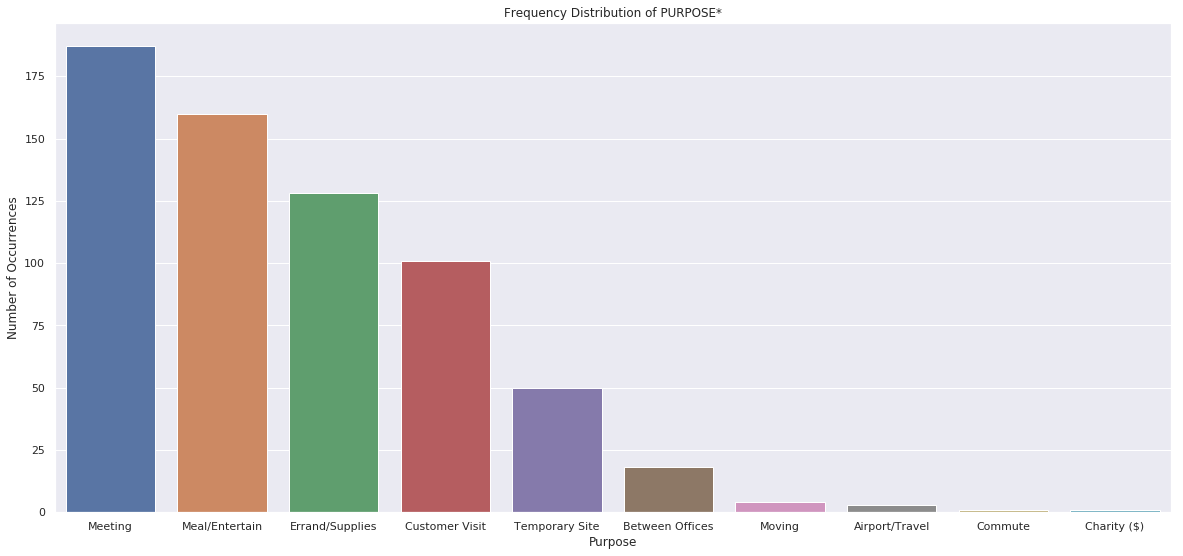

In [0]:
#This code here displays the frequency distribution of the PURPOSE* column in a bar chart form.
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
category_count = data['PURPOSE*'].value_counts()
sns.set(style = "darkgrid")
sns.set(rc={'figure.figsize':(20,9)})
sns.barplot(category_count.index, category_count.values, alpha = 1)
plt.title('Frequency Distribution of PURPOSE*')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Purpose', fontsize = 12)
plt.show()

*Figure 7: PURPOSE Summary and Bar Chart of the PURPOSE attribute*


Based on Figure 7: PURPOSE Summary and Bar Chart of the PURPOSE attribute,the top three purposes are Meeting with 187, followed by Meal/Entertain with 160 and Errand/Supplies with 128. The lowest purpose of Uber Trip are Charity($) and Commute with only one record. Like the other attributes, the datatype is also int64.

## **DATA METHODOLOGY**


The aim of this project is to understand consumer behaviour based on the attributes in the dataset provided.

Firstly, the attributes available in the training dataset that can be analysed to help meet the objective were identified. 

However, there were problems encountered in the data exploration process such as:
1. Null Values in PURPOSE Column: These values are represented by NaN. 
2. Incorrect Classification of Maximum Value in MILES column: This occurred due to extra row showing calculated total. The maximum value is supposed to be 322 miles.
3. Incorrect Datatype Classification of START_DATE and END_DATE columns: The datatype classification in the initial data exploration was non-null object but it is supposed to be datetime.
4. Records with Unknown Location for START and STOP columns.

Then the following pre-processing and transformation techniques were done to make the dataset usable:

### **1. Null Values in Purpose Column**
The code below shows that there are 507 values out 1156 that are null values. 

In [0]:
#checking null values from the dataset
print(data.isnull().values.sum())

507


In [0]:
#checking null values by columns
print(data.isnull().sum())

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64


Figure 8: Null Value Summary

Based on Figure 12: Null Value Summary, there are 507 missing values in this dataset. The PURPOSE* column contains the most null values with 503, followed by the END_DATE* column ,CATEGORY* column, START* column and STOP* column, all containing one null value.

To fix the null value issue in the PURPOSE* column, the following processes were done:

In [0]:
#Step 1: Find how many null values are in the PURPOSE* column. 
#False represents the rows in the dataset that are not null.
#True represents the records of null values.
print(data['PURPOSE*'].isnull().value_counts())

False    1156
Name: PURPOSE*, dtype: int64


The decision to replace these True values from the PURPOSE* summary above to a new name called Unknown Purpose.

In [0]:
#Step 2: Replace missing values with new name called "Unknown Purpose"
data["PURPOSE*"].fillna("Unknown Purpose", inplace = True)

In [0]:
#Step 3: Recheck the PURPOSE* column summary
print(data['PURPOSE*'].value_counts())

Unknown Purpose    503
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: PURPOSE*, dtype: int64


Figure 9: Final PURPOSE* Summary

Based on Figure 9: Final PURPOSE* Summary, all 1156 rows are now categorised. The data is now usable for testing. 

### **2.Incorrect Classification of Maximum Value in Miles column due to extra row showing calculated total**

In [0]:
#Step 1: Remove the last row of the dataset (since there is no value there except the total number of MILES*)
data.drop(data.tail(1).index, inplace=True)

In [0]:
#Step 2: Recheck all attributes have the same number of rows with unique values (no duplicate).
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 0 to 1153
Data columns (total 7 columns):
START_DATE*    1154 non-null object
END_DATE*      1154 non-null object
CATEGORY*      1154 non-null object
START*         1154 non-null object
STOP*          1154 non-null object
MILES*         1154 non-null float64
PURPOSE*       1154 non-null object
dtypes: float64(1), object(6)
memory usage: 72.1+ KB


In [0]:
#Step 3: Check if there're duplicate rows. If it record states true, it means there are still duplicate rows
#However, all rows show false meaning there are no duplicated rows.
data.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1125    False
1126    False
1127    False
1128    False
1129    False
1130    False
1131    False
1132    False
1133    False
1134    False
1135    False
1136    False
1137    False
1138    False
1139    False
1140    False
1141    False
1142    False
1143    False
1144    False
1145    False
1146    False
1147    False
1148    False
1149    False
1150    False
1151    False
1152    False
1153    False
1154    False
Length: 1155, dtype: bool

### **3. Incorrect Datatype Classification of Start_Date and End_Date columns**

In [0]:
#Before converting START_DATE* and END_DATE* to datatime datatype,make a copy of it first "copy_data", 
copy_data = data.copy()

In [0]:
#from datetime import datetime
#convert the 'Date' column to datetime format 
data['START_DATE*']= pd.to_datetime(data['START_DATE*'], dayfirst=True, errors='coerce') 
data['END_DATE*']= pd.to_datetime(data['END_DATE*'], dayfirst=True, errors='coerce')   
# Check the format of 'Date' column 
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
START_DATE*    1155 non-null datetime64[ns]
END_DATE*      1155 non-null datetime64[ns]
CATEGORY*      1155 non-null object
START*         1155 non-null object
STOP*          1155 non-null object
MILES*         1155 non-null float64
PURPOSE*       1155 non-null object
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


## **Interesting Findings of Attributes**

Copies of the dataset were done to find interesting attributes so no results were affected.

In [0]:
#after cleaning the data
#make a copy "copy_data"
#do more exploration in the "copy_data"
#anything happens, wont affect to original data
#if anything error during exploring data, can just come back and run the code below (dont need to go back and run everything from the start)

#dont need to run 2 lines of code below, 
#we did in cell 83 already
#copy_data = data.copy()
#copy_data.head()

In [0]:
#This code partitions the START_DATE* and END_DATE* column.
# 1) START_DATE* => START_DATE and START_TIME*
# 2) END_DATE* => END_DATE and END_TIME*

# ******************** #

new_columns = copy_data["START_DATE*"].str.split(" ", n = 1, expand = True)

#making separate START_DATE column from new data frame
copy_data["START_DATE"] = new_columns[0]

#making separate START_TIME* cloumn from new data frame
copy_data["START_TIME*"] = new_columns[1]

#dropping old START_DATE* column
copy_data.drop(columns = ["START_DATE*"], inplace = True)

#....

#spitting END_DATE* to END_DATE* & END_TIME*
#new data frame with split value columns
new_columns = copy_data["END_DATE*"].str.split(" ", n = 1, expand = True)

#making seperate END_DATE column from new data frame
copy_data["END_DATE"] = new_columns[0]

#making seperate END_TIME* cloumn from new data frame
copy_data["END_TIME*"] = new_columns[1]

#dropping old END_DATE* column
copy_data.drop(columns = ["END_DATE*"], inplace = True)

#display the copy_data with new created columns
copy_data.head()

,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START_DATE,START_TIME*,END_DATE,END_TIME*
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1/1/16,21:11,1/1/16,21:17
1,Business,Fort Pierce,Fort Pierce,5.0,Unknown Purpose,1/2/16,01:25,1/2/16,01:37
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1/2/16,20:25,1/2/16,20:38
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1/5/16,17:31,1/5/16,17:45
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1/6/16,14:42,1/6/16,15:49


*Figure 10: Copying the Data and Adding New Columns*

Based on *Figure 10: Copying the Data and Adding New Columns*, there are four new columns namely START_DATE, START_TIME*, END_DATE, END_TIME*. The previous START_DATE* and END_DATE* column were separated for temporary use and to find interesting data.


In [0]:
#This code partitions the START_DATE* and END_DATE* column.
# 1) START_DATE => S_MONTH, S_DAY, S_YEAR
# 2) END_DATE => E_MONTH, E_DAY, E_YEAR

# ******************** #

new_columns1 = copy_data["START_DATE"].str.split("/", 0,expand = True)

#making separate START_DATE column from new data frame
copy_data["S_MONTH"] = new_columns1[0]

#making sepsrate START_TIME* cloumn from new data frame
copy_data["S_DAY"] = new_columns1[1]

#making separate START_TIME* cloumn from new data frame
copy_data["S_YEAR"] = new_columns1[2]

#dropping old START_DATE* column
copy_data.drop(columns = ["START_DATE"], inplace = True)

#....

new_columns1 = copy_data["END_DATE"].str.split("/", 0, expand = True)

#making separate END_DATE column from new data frame
copy_data["E_MONTH"] = new_columns1[0]

#making separate END_TIME* cloumn from new data frame
copy_data["E_DAY"] = new_columns1[1]

#making separate START_TIME* cloumn from new data frame
copy_data["E_YEAR"] = new_columns1[2]

#dropping old END_DATE* column
copy_data.drop(columns = ["END_DATE"], inplace = True)

#display the copy_data with new created columns
copy_data.head()

,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START_TIME*,END_TIME*,S_MONTH,S_DAY,S_YEAR,E_MONTH,E_DAY,E_YEAR
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11,21:17,1,1,16,1,1,16
1,Business,Fort Pierce,Fort Pierce,5.0,Unknown Purpose,01:25,01:37,1,2,16,1,2,16
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20:25,20:38,1,2,16,1,2,16
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17:31,17:45,1,5,16,1,5,16
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14:42,15:49,1,6,16,1,6,16


*Figure 11: Copying the Dataset Again and Adding New Columns*

Based on *Figure 11: Copying the Dataset Again and Adding New Columns*, the previously made START_TIME* and END_TIME* columns are present. The day,month and year have separate columns. In the intial data exploration summary, there are inconsistencies with year format (YY or YYYY) but there is no issue as it will not be used. The S_MONTH column is made for the scatter plot and analysis of relationships between certain attributes. 


In [0]:
#This code here is the copy_data summary which has twelve non-null objects and one float64. All of these attributes have 1155 records.
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 13 columns):
CATEGORY*      1155 non-null object
START*         1155 non-null object
STOP*          1155 non-null object
MILES*         1155 non-null float64
PURPOSE*       1155 non-null object
START_TIME*    1155 non-null object
END_TIME*      1155 non-null object
S_MONTH        1155 non-null object
S_DAY          1155 non-null object
S_YEAR         1155 non-null object
E_MONTH        1155 non-null object
E_DAY          1155 non-null object
E_YEAR         1155 non-null object
dtypes: float64(1), object(12)
memory usage: 126.3+ KB


In [0]:
#This code converts S_MONTH & E_MONTH from object to int64 datatype
copy_data['S_MONTH'] = copy_data.S_MONTH.astype(int)
copy_data['E_MONTH'] = copy_data.E_MONTH.astype(int)

### **1. Correlation between Purpose and Miles**

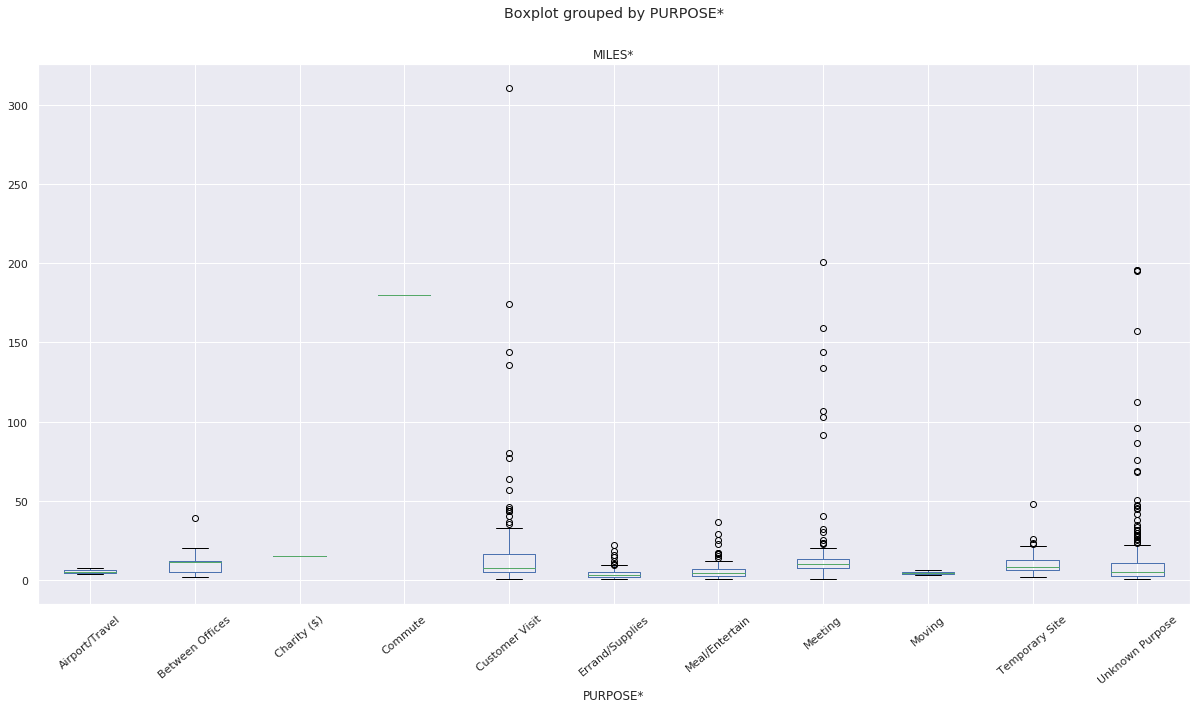

In [0]:
#to checking the correlation between MILES* and PURPOSE* attributes
#one of the interesting data point is:
#purpose "commute" has got the highest distance of travelling (approx more than 300 miles)
data.boxplot('MILES*', 'PURPOSE*', rot = 40, figsize = (20,10))

Figure 12: Box Plot showing correlation between Purpose and Miles

Based on Figure 12: Box Plot showing correlation between Purpose and Miles, the dataset is clustered in the 0-50 miles range. There are several outliers in the Customer Visit, Meeting, Errand/Supplies, Meal/Entertain, Temporary Site and Unknown Purpose evidenced by the circles. The trip with largest miles distance just above 300 has the purpose of Customer Visit.

### **2. Correlation between Category:Business, Purpose, Miles with the Start: Cary**

There are six main steps done in order to show the scatter plot.

In [0]:
#Step 1: Make another copy of "copy_data" and select only the "Business" value from CATEGORY* column
cat_bus_data = copy_data.loc[copy_data['CATEGORY*'] == "Business"]

In [0]:
#Step 2: Check the first five rows with business as the CATEGORY*
cat_bus_data.head(5)

,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START_TIME*,END_TIME*,S_MONTH,S_DAY,S_YEAR,E_MONTH,E_DAY,E_YEAR
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11,21:17,1,1,16,1,1,16
1,Business,Fort Pierce,Fort Pierce,5.0,Unknown Purpose,01:25,01:37,1,2,16,1,2,16
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20:25,20:38,1,2,16,1,2,16
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17:31,17:45,1,5,16,1,5,16
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14:42,15:49,1,6,16,1,6,16


In [0]:
#Step 3: Count the rows with Business as the CATEGORY*
cat_bus_data['CATEGORY*'].value_counts()

Business    1078
Name: CATEGORY*, dtype: int64

In [0]:
#Step 4:  Make another copy of "copy_data" and select only the "Cary" value from START* column
sta_cary_data= cat_bus_data.loc[cat_bus_data["START*"] == "Cary"]

In [0]:
#Step 5: Count the rows with Cary as the START*
sta_cary_data['START*'].value_counts()

Cary    198
Name: START*, dtype: int64

In [0]:
#Step 6: Rename the PURPOSE* column to PURPOSE. This step is done as PURPOSE* doesn't work for scatter plot.
sta_cary_data.rename(columns={"PURPOSE*" : "PURPOSE"}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [0]:
import plotly.express as px
px.scatter(sta_cary_data.query('PURPOSE == ["Unknown Purpose", "Meeting", "Meal/Entertain", "Customer Visit", "Temporary Site", "Between Offices", "Moving", "Airport/Travel", "Charity ($)", "Commute"]'), 
           x = "S_MONTH", y = "MILES*", color = "PURPOSE", trendline = "ols")

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecat

*Figure 13: Scatter plot showing Correlation between Category:Business, Purpose, Miles with the Start: Cary*


Based on Figure 13: Scatter plot showing Correlation between Category:Business, Purpose, Miles with the Start: Cary, the dataset is clustered in the 0-30 miles range meaning the trips are short distance. There are two main outliers: March with Purpose: Customer Visit and in October with Purpose:Meeting. There are interesting findings with the Between Offices line in Orange and Customer Visit line in Green. From February (Month 2) to November (Month 11), the number of trips with Between Offices purpose increases significantly. On the other hand, the number of trips with Customer Visit decreases throughout the year.

### **3. Correlation between Category,Miles with the Purpose: Unknown Purpose**

There are five main steps done in order to show the scatter plot.

In [0]:
#Step 1: Make another copy of "copy_data" and select both values (Personal and Business) from CATEGORY* column
copy1_data = copy_data.copy()

In [0]:
#Step 2: Convert S_MONTH & E_MONTH from object to int64 datatype
copy1_data['S_MONTH'] = copy1_data.S_MONTH.astype(int)
copy1_data['E_MONTH'] = copy1_data.E_MONTH.astype(int)

In [0]:
#Step 3:  Make another copy of "copy_data" and select only Unknown Purpose values from PURPOSE* column
unknown_p_data = copy1_data.loc[copy1_data["PURPOSE*"] == "Unknown Purpose"]

In [0]:
#Step 4: Show the first five rows of unknown purpose.
unknown_p_data.head()

,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START_TIME*,END_TIME*,S_MONTH,S_DAY,S_YEAR,E_MONTH,E_DAY,E_YEAR
1,Business,Fort Pierce,Fort Pierce,5.0,Unknown Purpose,01:25,01:37,1,2,16,1,2,16
32,Business,Whitebridge,Lake Wellingborough,7.2,Unknown Purpose,9:09,9:23,1,19,2016,1,19,2016
85,Personal,Whitebridge,Northwoods,5.3,Unknown Purpose,10:54,11:07,2,9,16,2,9,16
86,Personal,Northwoods,Tanglewood,3.0,Unknown Purpose,11:43,11:50,2,9,16,2,9,16
87,Personal,Tanglewood,Preston,5.1,Unknown Purpose,13:36,13:52,2,9,16,2,9,16


In [0]:
#Step 5: Rename the CATEGORY* column to CATEGORY. This step is done as CATEGORY* doesn't work for scatter plot.
copy1_data.rename(columns={"CATEGORY*" : "CATEGORY"}, inplace = True)

In [0]:
import plotly.express as px
px.scatter(copy1_data.query('CATEGORY == ["Business", "Personal"]'), 
           x = "S_MONTH", y = "MILES*", color = "CATEGORY", trendline = "ols")

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



*Figure 14: Scatter plot showing Correlation between Category,Miles with the Purpose: Unknown Purpose*


Based on Figure 14: Scatter plot showing Correlation between Category,Miles with the Purpose: Unknown Purpose, the dataset is clustered in the 0-30 miles range meaning the trips are short distance. The Business trips were constant and steady throughout the year. On the other hand, the personal trips increased through February(Month 2) until July(Month 7). 

# EVALUATION AGAINST CLASSIFIERS

In this data mining project, four classified techniques were used to predict the effectiveness and accuracies of the cleaned dataset. These four methods were chosen because they are all considered as simplest classification algorithms commonly use for machines learning. (reference). Moreover, all of the used models have similar ways of implementing. We have to split the data into input and validation parts to produce the outcomes. 

In order to test the different classifiers and assess the accuracy of classification performance, multiple steps were applied to the dataset. 

Step 1:  Make a copy of data so that we can make sure any progression or problems that might occur during the testing prediction won't affect the original dataset. 

Step 2: Decide which columns produce the best outcomes for accuracy and confusion matrix. The columns chosen were CATEGORY, START, STOP, PURPOSE and MILES.

Step 3:  Convert all of the objects to the "int" datatype. The four chosen classifiers do not recognise nominal attributes.

Step 4: Use the same amount of input and validation datasets to not create bias of the overall accuracy in the results.

In [0]:
#to copy the whole data
cop_data = data.copy()
cop_data.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown Purpose
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-06-01 17:15:00,2016-06-01 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,2016-06-01 17:30:00,2016-06-01 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,2016-07-01 13:27:00,2016-07-01 13:33:00,Business,Cary,Cary,0.8,Meeting
8,2016-10-01 08:05:00,2016-10-01 08:25:00,Business,Cary,Morrisville,8.3,Meeting
9,2016-10-01 12:17:00,2016-10-01 12:44:00,Business,Jamaica,New York,16.5,Customer Visit


In [0]:
#dropping old START_DATE* column
cop_data.drop(columns = ["START_DATE*"], inplace = True)
#dropping old END_DATE* column
cop_data.drop(columns = ["END_DATE*"], inplace = True)

#displaying dataset after dropping START_DATE* and END_DATE* columns
cop_data.head(10)

,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,Business,Fort Pierce,Fort Pierce,5.0,Unknown Purpose
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,Business,Cary,Cary,0.8,Meeting
8,Business,Cary,Morrisville,8.3,Meeting
9,Business,Jamaica,New York,16.5,Customer Visit


In [0]:
#converting START* to category type (int64)
labels = cop_data['START*'].astype('category').cat.categories.tolist()
replace_new_cop = {'START*' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_new_cop)

{'START*': {'Agnew': 1, 'Almond': 2, 'Apex': 3, 'Arabi': 4, 'Arlington': 5, 'Arlington Park at Amberly': 6, 'Asheville': 7, 'Austin': 8, 'Banner Elk': 9, 'Bellevue': 10, 'Berkeley': 11, 'Boone': 12, 'Briar Meadow': 13, 'Bryson City': 14, 'Burtrose': 15, 'CBD': 16, 'Capitol One': 17, 'Cary': 18, 'Central': 19, 'Chalmette': 20, 'Chapel Hill': 21, 'Chessington': 22, 'College Avenue': 23, 'Colombo': 24, 'Columbia Heights': 25, 'Congress Ave District': 26, 'Connecticut Avenue': 27, 'Convention Center District': 28, 'Cory': 29, 'Couples Glen': 30, 'Covington': 31, 'Coxville': 32, 'Daytona Beach': 33, 'Downtown': 34, 'Durham': 35, 'Eagan Park': 36, 'Eagle Rock': 37, 'East Austin': 38, 'East Elmhurst': 39, 'East Harlem': 40, 'Eastgate': 41, 'Edgehill Farms': 42, 'El Cerrito': 43, 'Elk Park': 44, 'Elmhurst': 45, 'Emeryville': 46, 'Fairmont': 47, 'Farmington Woods': 48, 'Fayetteville Street': 49, 'Financial District': 50, 'Flatiron District': 51, 'Florence': 52, 'Fort Pierce': 53, 'Fuquay-Varina

In [0]:
cop_data.replace(replace_new_cop, inplace=True)

print(cop_data.head())

  CATEGORY*  START*            STOP*  MILES*         PURPOSE*
0  Business      53      Fort Pierce     5.1   Meal/Entertain
1  Business      53      Fort Pierce     5.0  Unknown Purpose
2  Business      53      Fort Pierce     4.8  Errand/Supplies
3  Business      53      Fort Pierce     4.7          Meeting
4  Business      53  West Palm Beach    63.7   Customer Visit


In [0]:
#converting STOP* to category type (int64)
labels = cop_data['STOP*'].astype('category').cat.categories.tolist()
replace_new_cop = {'STOP*' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_new_cop)

{'STOP*': {'Agnew': 1, 'Alief': 2, 'Almond': 3, 'Apex': 4, 'Arabi': 5, 'Arlington': 6, 'Arlington Park at Amberly': 7, 'Arts District': 8, 'Asheville': 9, 'Banner Elk': 10, 'Bay Farm Island': 11, 'Bellevue': 12, 'Berkeley': 13, 'Boone': 14, 'Briar Meadow': 15, 'Bryson City': 16, 'Burtrose': 17, 'Bywater': 18, 'CBD': 19, 'Capitol One': 20, 'Cary': 21, 'Cedar Hill': 22, 'Central': 23, 'Chalmette': 24, 'Chapel Hill': 25, 'Chessington': 26, 'College Avenue': 27, 'Colombo': 28, 'Columbia Heights': 29, 'Congress Ave District': 30, 'Convention Center District': 31, 'Cory': 32, 'Covington': 33, 'Coxville': 34, 'Daytona Beach': 35, 'Depot Historic District': 36, 'Downtown': 37, 'Durham': 38, 'Eagle Rock': 39, 'East Elmhurst': 40, 'East Harlem': 41, 'Edgehill Farms': 42, 'El Cerrito': 43, 'Elk Park': 44, 'Emeryville': 45, 'Farmington Woods': 46, 'Faubourg Marigny': 47, 'Financial District': 48, 'Florence': 49, 'Fort Pierce': 50, 'French Quarter': 51, 'Fuquay-Varina': 52, 'Galveston': 53, 'Gampah

In [0]:
cop_data.replace(replace_new_cop, inplace=True)

print(cop_data.head())

  CATEGORY*  START*  STOP*  MILES*         PURPOSE*
0  Business      53     50     5.1   Meal/Entertain
1  Business      53     50     5.0  Unknown Purpose
2  Business      53     50     4.8  Errand/Supplies
3  Business      53     50     4.7          Meeting
4  Business      53    182    63.7   Customer Visit


In [0]:
#converting PURPOSE* to category type (int64)
labels = cop_data['PURPOSE*'].astype('category').cat.categories.tolist()
replace_new_cop = {'PURPOSE*' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_new_cop)

{'PURPOSE*': {'Airport/Travel': 1, 'Between Offices': 2, 'Charity ($)': 3, 'Commute': 4, 'Customer Visit': 5, 'Errand/Supplies': 6, 'Meal/Entertain': 7, 'Meeting': 8, 'Moving': 9, 'Temporary Site': 10, 'Unknown Purpose': 11}}


In [0]:
cop_data.replace(replace_new_cop, inplace=True)

print(cop_data.head())

  CATEGORY*  START*  STOP*  MILES*  PURPOSE*
0  Business      53     50     5.1         7
1  Business      53     50     5.0        11
2  Business      53     50     4.8         6
3  Business      53     50     4.7         8
4  Business      53    182    63.7         5


In [0]:
#checking if they are now changed to int64 (START*, STOP*, PURPOSE*)
print(cop_data.dtypes)

CATEGORY*     object
START*         int64
STOP*          int64
MILES*       float64
PURPOSE*       int64
dtype: object


After converting all the attributes into "int" datatype, the next step was done,

Step 5: Partition the dataset into two parts: training and testing. When doing this step, testing of various percentages of partitioning were done. 80% for training and 20% produced very high ratings.  Partitioning of 75% and 25% did not produce good results and had higher bias making the dataset no longer usable for further investigation. The best proportion of splitting the training and dataset is 70:30 according to this source (reference).  

In [0]:
#splitting the training (70) and testing(30) data
#keep CATEGORY* as object datatype
y = cop_data['CATEGORY*'] 
X = cop_data.drop('CATEGORY*', axis = 1) 

#dividing data into training and testing sets using "train_test_split" utility from sklearn.model.selection library
X_train, X_test, y_train, y_test = model_selection.train_test_split( 
                           X, y, test_size = 0.30, random_state = 0) 
  
print(X.head()) 
print('') 
print(y.head())

   START*  STOP*  MILES*  PURPOSE*
0      53     50     5.1         7
1      53     50     5.0        11
2      53     50     4.8         6
3      53     50     4.7         8
4      53    182    63.7         5

0    Business
1    Business
2    Business
3    Business
4    Business
Name: CATEGORY*, dtype: object


### Algorithm Comparison of Logistic Regression, K-Nearest Neighbour Algorithm, Decision Tree and Random Forest

In order to create comparison between the four different classifiers, the algorithms need to built and cross-validated. Also, the models need be evaluated through confusion matrix and accuracy statistics.

In [0]:
#BUILDING AND CROSS-VALIDATING THE MODEL
algorithms = [] 
scores = [] 
names = [] 
  
algorithms.append(('Logisitic Regression', LogisticRegression())) 
algorithms.append(('K-Nearest Neighbours', KNeighborsClassifier())) 
algorithms.append(('Decision Tree', DecisionTreeClassifier())) 
algorithms.append(('Random Forest', RandomForestClassifier())) 
  
for name, algo in algorithms: 
    k_fold = model_selection.KFold(n_splits = 10, random_state = 0) 
  
    # Applying k-cross validation 
    cvResults = model_selection.cross_val_score(algo, X_train, y_train, 
                                      cv = k_fold, scoring ='accuracy') 
  
    scores.append(cvResults) 
    names.append(name) 
    print(str(name)+' : '+str(cvResults.mean()))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logis

Logisitic Regression : 0.9220061728395061
K-Nearest Neighbours : 0.9170370370370371
Decision Tree : 0.9010339506172839
Random Forest : 0.9096604938271605


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will chan

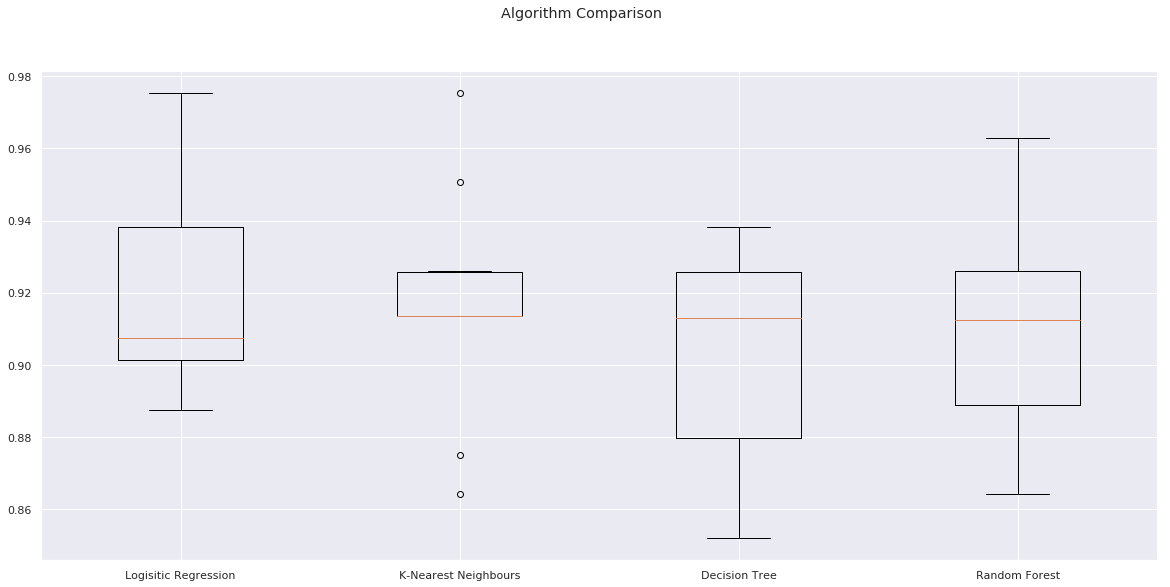

In [0]:
#VISUALLY COMPARING THE RESULTS OF THE DIFFERENT ALGORITHMS
fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(scores) 
ax.set_xticklabels(names) 
plt.show()

In [0]:
#MAKING PREDICTIONS AND EVALUATING THE PREDICTIONS
for name, algo in algorithms: 
    clf = algo 
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test) 
    pred_score = accuracy_score(y_test, y_pred) 
  
    print(str(name)+' : '+str(pred_score)) 
    print('') 
    print('Confusion Matrix: '+str(confusion_matrix(y_test, y_pred))) 
    print(classification_report(y_test, y_pred))

Logisitic Regression : 0.9596541786743515

Confusion Matrix: [[333   0]
 [ 14   0]]
              precision    recall  f1-score   support

    Business       0.96      1.00      0.98       333
    Personal       0.00      0.00      0.00        14

    accuracy                           0.96       347
   macro avg       0.48      0.50      0.49       347
weighted avg       0.92      0.96      0.94       347

K-Nearest Neighbours : 0.9481268011527377

Confusion Matrix: [[328   5]
 [ 13   1]]
              precision    recall  f1-score   support

    Business       0.96      0.98      0.97       333
    Personal       0.17      0.07      0.10        14

    accuracy                           0.95       347
   macro avg       0.56      0.53      0.54       347
weighted avg       0.93      0.95      0.94       347

Decision Tree : 0.8847262247838616

Confusion Matrix: [[305  28]
 [ 12   2]]
              precision    recall  f1-score   support

    Business       0.96      0.92      0.94   

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Figure 15 : Box Plot and Confusion Matrix of Algorithm Comparison with Four Different Classifiers


Based on Figure 15: Box Plot and Confusion Matrix of Algorithm Comparison with Four Different Classifiers, the confusion matrix is based on the category column (Business and Personal) and includes the accuracy and macro/weighted average. The logistic regression produced the highest accuracy results with 95.9% almost 96% followed by K-Nearest Neighbour classifier with 94.8%. The Decision Tree Classifier had the lowest accuracy with 88.1%. 
The Business Precision Score of 0.96 and the support values were consistent for all four different classifiers. Logistic Regression had the highest recall score for the category of Business of 1.00 followed by K-Nearest neighbour with 0.98. Logistic Regression had the highest f1-score of 0.98 for the Business Category. K-Nearest Neighbour and Random Forest had the same f1-score leaving decision tree with the lowest at 0.94.



# **RECOMMENDED CLASSIFIER FOR DATASET:**

All these four clasifiers are suitable for classification and implementation. However, after serious consideration, the recommended classifier for this dataset is logistic regression based on these reasons. 

1. Logistic regression is highly interpretable and very efficient. It works better when there are attributes removed from the dataset. It produces very accurate results quickly. It can handle missing data and is accepted for high performance. Logistic regression across the board has the best accuracy of 95.9%. It has the highest recall and f1-score.

2. The decision tree classifier is unstable and relatively inaccurate compared to the other classifiers. The information is biased with categorical variables and calculations are very complex. The Decision Tree classifier also has issues with overfitting training data because the training data is noisy.

3. The K-Nearest Neighbour classifier decreases speed of the algorithm fast and only works with small input variables. It doesn't perform well with imbalanced data and has no capability of dealing with missing values. K-Nearest Neighbours also does not accept outliers, making it harder to evaluate the dataset.

4. The Random Forest classifier has issues with complexity and requires more computational power. It also needs more time to train compared with the other classifiers.

# SOCIAL and ETHICAL ASPECTS

For this data mining project, the rights approach was adopted. This Rights approach is derived from Kantian duty-based ethics. The rights approach is an ethical action that best protects and respects the moral rights of the affected parties. "It emphasises the belief that all humans have a right to dignity." (Bonde et. al 2013).

One of the aspects of this approach is the right to privacy which is "the right to do, believe and say whatever we choose in our personal lives so long as we do not violate the rights of others" (Markkula Center for Applied Ethics 2015). For all the trips in the dataset, the customer was given the right of privacy. There was no mention of any personal details like names or addresses or payment method used by customers.  
 

Overall, Uber ,as a transport company, has satisfied the common good and fairness ethical approach by introducing and providing: 

* Convenience: Customers enjoy the ease of accessibility to the platform as the customer can choose an appointment, pick up time with few presses of a button. "Uber customers typically wait no more than three minute for a ride. Riders have the option to share rides with others heading the same direction." (Goetz 2016). 
 
* Opportunity and Cost Savings: Uber has provided a source of employment to underemployed and people who want to have extra income. It has also provided cost savings for customers as they avoid the cost of owning a personal vehicle. It is cheaper than a lot of other companies which has led to Uber's growth in sales all over the world. "These savings apply most to riders who don't need cars daily but might need a ride for weekend outings and other special occasions." (Goetz 2016). 
 
* Accessibility: Uber has provided options for disabled riders with cashless payments, on-demand transportation and upfront pricing. Uber is developing technology to help 'increase the mobility and independence of transportation' for these individuals.   
 
* Anti-discrimination policies: The aim of Uber is to treat everyone with respect. In their community guidelines, they have provided a rule not  to refuse to provide services based on characteristics. If a user has violated this, the person will automatically lose access to this platform.   

  
On the other hand, Uber has violated the rights and virtue ethical approaches with the following:  
  
1. Invasion of Privacy through: 
>A) God View: God View was a tool used to trace "high-profile politicians, celebrities and even personal acquaintances of Uber employees, including ex-boyfriend/ex-girlfriends." (Hern 2016). "The system not only provided Uber an aerial-like view of all of the cars in the city, but also contained the personal information of the riders in them." (Carson 2016)  
 
  >The first incident happened in 2011 with a venture capitalist named Peter Sims who claimed he was traced by a visitor to Uber's Chicago offices where the data was shown on a large screen. A second incident occurred in November 2014 where Buzzfeed reported that their reporter, Johana Bhuiyan, was also tracked with God View tool without her permission.  
 
  >B) Data breaches: There has news that Uber had data breach in 2016 but only reported the data breach occurred in 2017, violating the virtue ethical approach. This data breach revealed names and drivers license numbers of 600000 drivers in the US and 57 million customers personal data. "Two individuals outside the company had inappropriately accessed user data stored on a third-party cloud based service that we use. The incident did not breach our corporate systems or infrastructure." (Khrosrowshahi 2017). Uber paid $100000 to the hackers to conceal the fact that the cyberattack had even occurred and to delete the stolen data. 
 
  >These invasion of privacy incidents have raised some concerns including use of data for improper purposes like espionage and manipulation of information. Some users have even resorted not to use the app.  
 
2. Evasion of Operations for Law Enforcement Individuals through:  
>A) Greyball: Greyball was an internal software tool that collects data from the Uber mobile app and other means to avoid giving rides to individuals where the Uber service is illegal. The tool was used first in December 2014 by showing "ghost cars" to targeted individuals. It was then made known by the New York Times on March 2017 who reported the use of Greyball to the public.  

  >B) Ripley: Ripley is another tool which Bloomberg News claimed in January 2018 that "Uber routinely used Ripley to prevent police raids in foreign countries." Initially, this was called an unexpected visitor protocol and was used from 2015-2016. This panic button disrupted government raids on Uber's offices by changing passwords, locking and turning off staff computers.  
  
3. Unsafe Conditions for Customers Due to :  
  > A) Assaulting Passengers : The fears of customers regarding Uber's background checks after reports of assaulted passengers happened. These incidents were committed by the Uber drivers themselves or individuals faking to be Uber drivers. In 2017, Susan Fowler reported she was harassed by a manager and was threatened with employee termination by another manager if she reported the incident.  

  > B) Committing Crimes: There was a shooting in February 2016 with Jason Dalton shooting eight people while driving in Michigan. As a result of this shooting, six people were dead and two were badly wounded. Uber was unaware of the multiple complains of this driver. A recent shooting in April 2019 was with a university student allegedly murdered.  
 


# CONCLUSION

Summary of findings in the dataset as follows: 

1. The dataset is a mixture of: 

>>* Trips that start and stop in cities from USA, Pakistan and Sri Lanka but most of them are based in USA. 

>>* Trips with different purpose (Airport/Travel, Between Offices, Charity($), Commute, Customer Visit, Errand/Supplies, Meal/Entertain, Meeting, Moving and Temporary Site) .  

>>* Trips with varying miles and number of occurrences per day.  

>>* Trips with different categories (Business and Personal). Majority of them have the category Business. 

>>* The top three purpose of the trips are Meeting, Meal/Entertain and Errand/Supplies. 

 

2. 1078 (93%) out of 1155 trips were categorised as Business.  The remaining 77 (7%) trips were categorised as Personal.  

 

3. The shortest Uber Drive averages on 0.5 miles and purpose is mainly for Errand/Supplies. On the other hand, the longest Uber Drive is 310.3 miles and purpose is mainly for customer visit.  

 

4. There were lesser trips made on public holidays and weekends. There are more trips on days leading to these special holidays like Christmas. 


It is recommended to: 

 

1. Investigate further if there is a need to include demographics such as gender and age. This might help discern if the services are used more by gender or specific age range and this customer segment can be targeted for marketing purposes. 

2. Apart from category and purpose of the trip, investigate further if customer is using  a coupon for the service or not. This is a good indicator if coupons or loyalty points entice customers to use the service. It can be used as an advertising strategy to retain and increase customer base. 

3. There are attributes that have missing information evidenced by the use of Unknown Purpose or Unknown Location. It can be studied if there is a need to have these fields as mandatory so that it is more meaningful rather than having an unknown value. 




# REFERENCE

Agarwal, M. n.d., *'Pythonic Data Cleaning With Pandas and NumPy'*, Real Python, viewed 12 September 2019, <https://realpython.com/python-data-cleaning-numpy-pandas/>. 

Carson, B. 2016, *‘Uber settles investigation into ‘God View’ tool'*, Tech Insider, viewed 12 September 2019, <https://businessinsider.com.au/uber-settles-investigation-into-god-view-tool-2016-1>.

Dataquest n.d., *'Tutorial: Using Pandas with Large Data Sets in Python'*, viewed 12 September 2019, <https://www.dataquest.io/blog/pandas-big-data/?fbclid=IwAR0p1t4ZIbGaUvbgqZV031Fa-fPS_RLqx_LlQApxuVmZgqxG7xV98yENAKk>. 

GeeksforGeeks n.d., *'30 minutes to machine learning'*, viewed 12 September 2019, <https://www.geeksforgeeks.org/30-minutes-to-machine-learning/?fbclid=IwAR23uoFVhOFNcMEFU3R-mAXNcq5oGSI9wq9sg08l6p2nqMIbYs4ZGn7MH_w>. 
 
GeeksforGeeks n.d., *'Covert the column type from string to date time format in Pandas data frame'*, viewed 12 September 2019, <https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/>. 
 
GeeksforGeeks n.d., *'How to approach a Machine Learning project: A step-wise guidance'*, viewed 12 September 2019, <https://www.geeksforgeeks.org/how-to-approach-a-machine-learning-project-a-step-wise-guidance/?fbclid=IwAR2JTxt7vf5XkyaCPxvwB12dbswFRmVopM7H2-uUcwF5I7RrJbUM2OUJSgU>.  

Goetz, L. 2016, *'4 Reasons Why People Choose Uber'*, Investopedia, viewed 12 September 2019, <https://www.investopedia.com/articles/markets/063016/4-reasons-why-riders-choose-uber.asp >.

Hern, A. 2016, *‘Uber Employees ‘spied on ex-partners, politicians and Beyoncé’*, The Guardian, viewed 12 September 2019,< https://www.theguardian.com/technology/2016/dec/13/uber-employees-spying-ex-partners-politicians-beyonce >.

Hurwitt, S. 2018, *'Classification in Python with Scikit-Learn and Pandas'*, Stack Abuse, viewed 17 September 2019, <https://stackabuse.com/classification-in-python-with-scikit-learn-and-pandas/?fbclid=IwAR103V2lBbTUHxEk9mqNSKQbzm5g9sYm7GVvmUrwjYe9ElR6Du7k52lXJjM>. 

Khosrowshahi, D. 2017, *‘2016 Data Security Incident‘*, Uber Newsroom, viewed 12 September 2019, <https://www.uber.com/newsroom/2016-data-incident/ >.

Krunal 2019, *'Python Mean Example | Python Statistics Mean() Function Tutorial'*, AppDivided, viewed 7 September 2019, <https://appdividend.com/2019/01/28/python-statistics-tutorial-mean-function-example/>. 

Li, S. 2017, *'Solving  A Simple Classification Problem with Python – Fruits Lovers Edition'*, Towards Data Science, viewed 17 September 2019, <https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2>. 
 
Malik, U. 2018, *'Text Classification with Python and Scikit-Learn'*, Stack Abuse, viewed 17 September 2018, <https://www.unbc.ca/sites/default/files/assets/academic_success_centre/writing_support/reflective_writing_151211_copy1.pdf>. 

Markkula Center for Applied Ethics. 2015, ‘How to Make an Ethical Decision’, *A Framework for Ethical Decision Making*, viewed 6 September 2019, <https://www.scu.edu/ethics/ethics-resources/ethical-decision-making/a-framework-for-ethical-decision-making/>.

Pandas 0.25..2 documentation n.d., *'Pandas.Series.str.split'*, viewed 17  September 2019, <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html>. 

Pathak, M. 2018, *'Handing Categorical Data in Python'*, DataCamp, viewed 14 September 2019, <https://www.datacamp.com/community/tutorials/categorical-data>. 
 
Plotly n.d., *'Scatter Plots in Pandas'*, viewed 14 September 2019, <https://plot.ly/pandas/line-and-scatter/>.  

Pratap, A. 2018, *‘UBER PESTEL ANALYSIS’*, notesmatic, viewed 6 September 2019, <https://notesmatic.com/uber-pestel-analysis/>.
 
Shahin, M. A., Maier, H. R., and Jaksa, M. B. 2004, 'Data division for developing neural networks applied to geotechnical engineering',  *Journal of Computing in Civil Engineering*, vol. 18(2), pp. 105-114. 
 
Stack Overflow 2015, *'Python Pandas – Changing some column types to categories'*, viewed 15 September 2019, <https://stackoverflow.com/questions/28910851/python-pandas-changing-some-column-types-to-categories?fbclid=IwAR3T9qFsWSujdXIDVWJF9ui6c-Hycng_01kJU1FOq4ZZ5hxgw-kg6I5JD0k>. 
 
Stack Overflow 2016, *'Python/Pandas convert string to time only'*, viewed 15 September 2019, <https://stackoverflow.com/questions/37801321/python-pandas-convert-string-to-time-only>. 
 
Stack Overflow 2018, *'How to handles string data in ML classification'*, viewed 15 September 2019, <https://stackoverflow.com/questions/54492847/how-to-handles-string-data-in-ml-classification?fbclid=IwAR3_2tmHeWIqylNitA8E_cBAlMFj1iMBDBFodLmDWycq5zYRMJ4rTYhEwY8>. 
 
Sullivan, J. 2018, *'Data Cleaning with Python and Pandas: Detecting Missing values'*, Towards Data Science, viewed 13 September 2019, <https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b>.  

Taylor, K. & Goggin, B. 2017, ’49 of the biggest scandals in Uber’s History, *Business Insider Australia*, viewed 11 September 2019, <https://www.businessinsider.com.au/uber-company-scandals-and-controversies-2017-11?r=US&IR=T >.

Thanh, N.P, Kappas, M. 2017, '*Comparison of Random Forest, k-Nearest Neighbour, and Support Vector Machine Classifiers for Land Cover Classification Using Sentinel-2 Imagery*' The National Centre for Biotechnology Information (NCBI), vol. 18, viewed 23 September 2019, <https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5796274/>. 

# VIDEO PITCH

*   Video of presetation
*   Link to the colab file